In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [2]:
instagramveri=pd.read_csv('final-v1.csv')

In [3]:
instagramveri.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [4]:
instagramveri.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

In [5]:
instagramveri=instagramveri.drop(['has_channel'], axis=1)

In [6]:
corr=instagramveri.corr()
corr

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_fake
edge_followed_by,1.000000,-0.054259,-0.033704,-0.071313,-0.019349,0.116751,-0.024593,-0.044327,0.036585,0.002749,0.180392,-0.136808
edge_follow,-0.054259,1.000000,-0.112940,0.160248,0.104735,-0.089677,-0.072626,-0.133170,-0.132422,0.002723,-0.108482,0.272649
username_length,-0.033704,-0.112940,1.000000,-0.160610,-0.021410,0.277052,0.117582,-0.099414,0.132683,-0.006861,0.112466,-0.151752
username_has_number,-0.071313,0.160248,-0.160610,1.000000,0.217852,-0.246511,-0.154072,0.127046,-0.278637,-0.048097,-0.237466,0.370164
full_name_has_number,-0.019349,0.104735,-0.021410,0.217852,1.000000,0.250275,-0.072366,0.066941,-0.083482,-0.012527,-0.039926,0.128588
full_name_length,0.116751,-0.089677,0.277052,-0.246511,0.250275,1.000000,0.064409,-0.216572,0.323137,0.122848,0.309318,-0.350433
is_private,-0.024593,-0.072626,0.117582,-0.154072,-0.072366,0.064409,1.000000,-0.071448,-0.134444,-0.016999,-0.041399,-0.262292
is_joined_recently,-0.044327,-0.133170,-0.099414,0.127046,0.066941,-0.216572,-0.071448,1.000000,-0.172122,-0.026889,-0.150433,0.276012
is_business_account,0.036585,-0.132422,0.132683,-0.278637,-0.083482,0.323137,-0.134444,-0.172122,1.000000,0.126443,0.289467,-0.318395
has_guides,0.002749,0.002723,-0.006861,-0.048097,-0.012527,0.122848,-0.016999,-0.026889,0.126443,1.000000,0.138415,-0.097421


<AxesSubplot:>

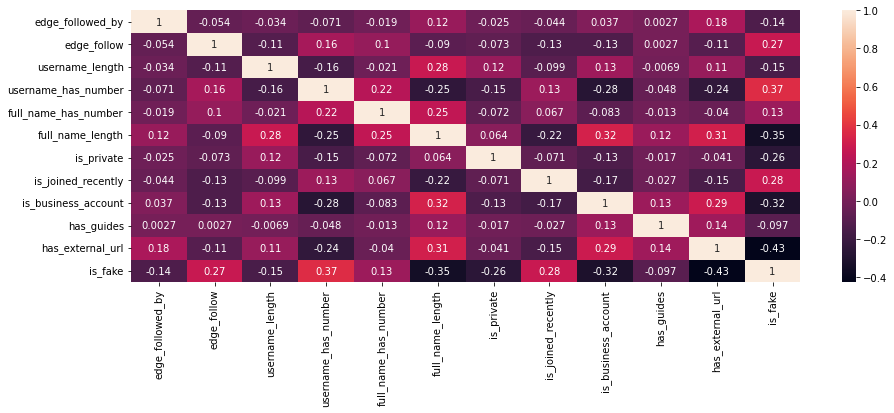

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=instagramveri.drop(['is_fake'], axis=1)
y=instagramveri['is_fake']

In [10]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.15)

In [11]:
X_train

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url
95,0.002,0.356,7,0,0,15,0,1,0,0,0
697,0.000,0.087,9,1,0,12,1,0,0,0,1
411,0.000,0.864,12,1,1,12,0,0,0,0,0
257,0.000,0.095,9,1,0,4,0,0,0,0,0
632,0.000,0.879,9,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
567,0.000,0.714,8,1,1,8,0,0,0,0,0
12,0.000,0.417,9,1,1,9,0,0,0,0,0
730,0.010,0.081,11,0,0,21,0,0,0,0,0
32,0.000,0.326,8,1,0,0,0,1,0,0,0


In [12]:
y_train

95     1
697    0
411    1
257    1
632    1
      ..
567    1
12     1
730    0
32     1
651    1
Name: is_fake, Length: 667, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [15]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()


In [16]:
def inspect(df):
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Duplicated Values: ')    
    print(df.duplicated().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    print('\n')
    print(f'Rows: {df.shape[0]}')   
    print(f'Attributes: {df.shape[1]}')
    print('\n')
    print('Head: ')
    print('\n')
    return df.head()

In [17]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
epochs_hist = model.fit(X_train, y_train, epochs = 120,  verbose = 1, validation_split = 0.1)

Epoch 1/120
19/19 [==============================] - 1s 9ms/step - loss: 0.5032 - accuracy: 0.8750 - val_loss: 0.3129 - val_accuracy: 0.8657
Epoch 2/120
19/19 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8900 - val_loss: 0.2465 - val_accuracy: 0.9254
Epoch 3/120
19/19 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9067 - val_loss: 0.2671 - val_accuracy: 0.9403
Epoch 4/120
19/19 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9350 - val_loss: 0.2627 - val_accuracy: 0.9403
Epoch 5/120
19/19 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9383 - val_loss: 0.2683 - val_accuracy: 0.9403
Epoch 6/120
19/19 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9350 - val_loss: 0.2578 - val_accuracy: 0.9403
Epoch 7/120
19/19 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9350 - val_loss: 0.2533 - val_accuracy: 0.9403
Epoch 8/120
1

Epoch 59/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9833 - val_loss: 0.6647 - val_accuracy: 0.9403
Epoch 60/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.6209 - val_accuracy: 0.9403
Epoch 61/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9750 - val_loss: 0.5344 - val_accuracy: 0.9552
Epoch 62/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9750 - val_loss: 0.6717 - val_accuracy: 0.9403
Epoch 63/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9850 - val_loss: 0.5823 - val_accuracy: 0.9403
Epoch 64/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9833 - val_loss: 0.6433 - val_accuracy: 0.9403
Epoch 65/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9783 - val_loss: 0.5988 - val_accuracy: 0.9403
Epoch 

19/19 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9900 - val_loss: 0.8047 - val_accuracy: 0.9552
Epoch 117/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9917 - val_loss: 0.9728 - val_accuracy: 0.9403
Epoch 118/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.9374 - val_accuracy: 0.9403
Epoch 119/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9933 - val_loss: 0.9923 - val_accuracy: 0.9403
Epoch 120/120
19/19 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9900 - val_loss: 0.9471 - val_accuracy: 0.9403


In [20]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


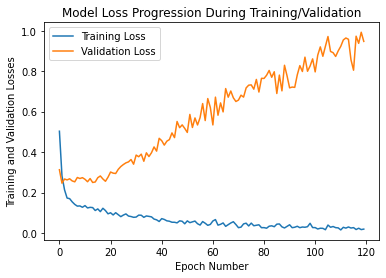

In [21]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [22]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [23]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [24]:
print(test)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.94      0.96      0.95       106

    accuracy                           0.92       118
   macro avg       0.77      0.73      0.75       118
weighted avg       0.91      0.92      0.91       118



In [28]:
filename = 'nn_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://3bf023ec-e2db-4c32-99dd-456a4fb0fef3/assets
